# NMR kinetics homework

<strong>Author(s):</strong> Seth D. Veenbaas, Jessica A. Nash, The Molecular Sciences Software Institute


<div class="alert alert-block alert-info">
<h2>Objectives:</h2>

- Make two plots with regression:
    - **First-order**: Plot ln[reactant] vs. time.
    - **Second-order**: Plot 1/[reactant] vs. time.
- Use the R-value of each linear regression to determine the order of the reaction.
- Use the slope of the linear regression to determine the rate constant (k) of the reaction.

<h3>Summary:</h3>

|                     |               First-order                |              Second-order               |
| :------------------ | :--------------------------------------: | :-------------------------------------: |
| **Rate Law**        |        $$ Rate = k [reactant] $$         |       $$  Rate = k [reactant]² $$       |
| **Integrated Form** | $$ ln[reactant] = -kt + ln[reactant₀] $$ | $$ 1/[reactant] = kt + 1/[reactant₀] $$ |
| **Linear Plot**     |    ln[reactant] vs. time (slope = -k)    |    1/[reactant] vs. time (slope = k)    |

</div>

# NMR kinetics: S<sub>N</sub>2

The SN2 reaction between 1-bromobutane (BuBr) and iodide ion (I–) proceeds via a single-step bimolecular mechanism.

Using NMR spectroscopy, the reaction's progress can be monitored by observing the disappearance of the BuBr signal (δ3.5) and the appearance of the BuI signal (δ3.3).

In this homework we will analyze different reaction conditions than in class.

| Reagents | Concentration |
| :------: | :-----------: |
|   BuBr   |    0.020 M    |
|   NaI    |    0.30 M     |


![reaction](../images/BuBr_reaction_scheme_full.jpeg)


Source: [NMR Kinetics of the SN2 Reaction between BuBr and I–: An Introductory Organic Chemistry Laboratory Exercise](https://pubs.acs.org/doi/10.1021/ed500371h)

In [1]:
# Import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

<div class="alert alert-block alert-warning">
<h3>Step 1</h3>

- Import the kinetics data from `'data/kinetics_data_condition2.xlsx'` into a DataFrame called `kinetics_data`.
- Use the `head()` method to examine the DataFrame. 

<br>

**Tip**: Use [`pd.read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

</div>

In [2]:
# Import excel to DataFrame
kinetics_data = pd.read_excel('../data/kinetics_data_condition2.xlsx')

# Examine DataFrame with head()
kinetics_data.head()

,Time(min),Integration_3.5_ppm,Integration_3.3_ppm,Normalized_BuBr,Normalized_BuI,[BuBr],[BuI],ln[BuBr],1/[BuBr]
0,0.5,6559060000,601458000,0.916004,0.083996,0.018320,0.001680,-3.999758,54.584941
1,1.0,6414670000,751854000,0.895088,0.104912,0.017902,0.002098,-4.022856,55.860426
2,1.5,6150330000,891667000,0.873379,0.126621,0.017468,0.002532,-4.047409,57.248936
3,2.0,5951120000,1082220000,0.846130,0.153870,0.016923,0.003077,-4.079105,59.092574
4,2.5,5802780000,1258900000,0.821728,0.178272,0.016435,0.003565,-4.108369,60.847387


<div class="alert alert-block alert-warning">
<h3>Step 2</h3>

Did you notice that the time for this experiment is reported in minutes? We need the time to be in sconds to calculate a rate constant (k) with appropriate units.

- Covert the `'Time(min)'` column into seconds and save the result to a new column called `'Time(s)'`.

<br>

**Tip**: syntax for [setting a column in Pandas](https://pandas.pydata.org/docs/user_guide/10min.html#setting):
```python
DataFrame_name['Grams'] = DataFrame_name['Kilograms'] / 1000
```

</div>

In [3]:
# Create a new column called 'Time(s)'
kinetics_data['Time(s)'] = kinetics_data['Time(min)'] * 60

## Plot ln[reactant] vs. time

**First-order Plot**: ln[reactant] vs. time (slope = -k)

Let's use Matplotlib to create a first-order reaction plot!

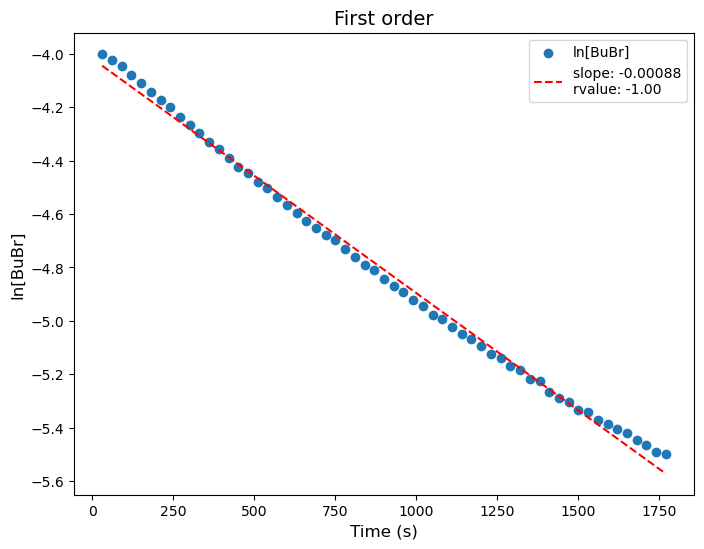

In [4]:
# Create a blank figure
plt.figure(figsize=(8, 6))

# Plot ln([BuBr]) vs Time
plt.scatter(
    x=kinetics_data['Time(s)'],
    y=kinetics_data['ln[BuBr]'],
    label="ln[BuBr]",
)

# Use scipy to perform linear regression
slope, intercept, rvalue, _, _ = linregress(
                                    kinetics_data['Time(s)'],
                                    kinetics_data['ln[BuBr]'],
)

# Add linear regression line (line = kt + ln[reactant₀])
regression_line = slope * kinetics_data['Time(s)'] + intercept

# Plot the linear regression line
plt.plot(
    kinetics_data['Time(s)'],
    regression_line,
    label=f"slope: {slope:.5f}\nrvalue: {rvalue:.2f}",
    color='red',
    linestyle='--'
)

# Add labels, title, and legend
plt.title("First order", fontsize=14)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("ln[BuBr]", fontsize=12)
plt.legend()

# Show plot
plt.show()

<div class="alert alert-block alert-warning">
<h3>Step 3</h3>

- Use matplotlib to create the plot for a second-order reaction: 1/[reactant] vs. time (slope = k).
- **bonus**: use Matplotlib to customize your plot.


</div>

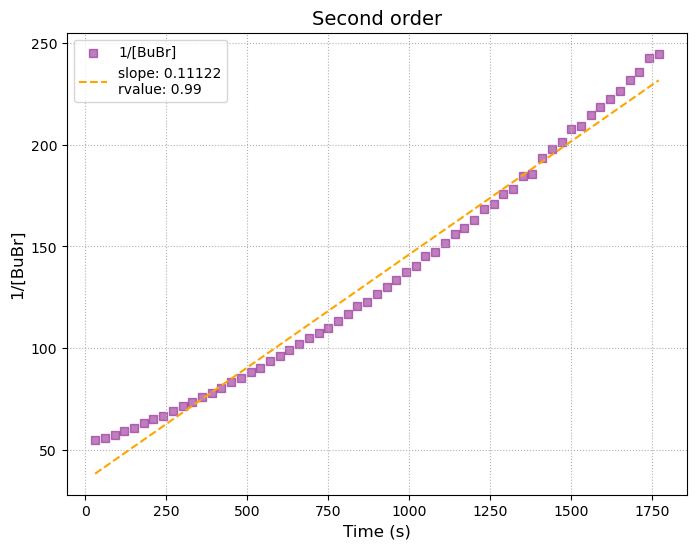

In [5]:
# Create a blank figure
plt.figure(figsize=(8, 6))

# Plot 1/[BuBr] vs Time
plt.scatter(
    x=kinetics_data['Time(s)'],
    y=kinetics_data['1/[BuBr]'],
    label="1/[BuBr]",
    color='purple',
    alpha=0.5,
    marker='s',
)

# Use scipy to perform linear regression
slope, intercept, rvalue, _, _ = linregress(
                                    kinetics_data['Time(s)'],
                                    kinetics_data['1/[BuBr]'],
)

# Add linear regression line (line = kt + 1/[reactant₀])
regression_line = slope * kinetics_data['Time(s)'] + intercept

# Plot the linear regression line
plt.plot(
    kinetics_data['Time(s)'],
    regression_line,
    label=f"slope: {slope:.5f}\nrvalue: {rvalue:.2f}",
    color='orange',
    linestyle='--'
)

# Add labels, title, and legend
plt.title("Second order", fontsize=14)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("1/[BuBr]", fontsize=12)
plt.legend()
plt.grid(visible=True, linestyle='dotted')

# Show plot
plt.show()

<div class="alert alert-block alert-warning">
<h3>Step 3</h3>

Pick the best linear regression form the plots to determine:

1) The reaction order.
2) The rate constant (k).

- Write your answer in the Markdown cell below.

</div>

- Reaction order: 1st
- rate constant (k): 0.00088 s^-1